<a href="https://colab.research.google.com/github/zi-onion/ESAA/blob/main/03_22_Sklearn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 05. 데이터전처리(Data Preprocessing)
결손값. 즉 NaN,Null 값은 허용되지 않음
 - 결손값이 적은 경우: null값을 피처의 평균값으로 대체
 - 결손값이 많은 경우: 피처를 드롭
 - 결손값이 일정 수준 이상: 해당 피처가 중요도가 높은 피처이고 Null을 단순히 피처의 평균값으로 대체할 경우 예측 왜곡이 심할 수 있다면 업무로직 등을 상세히 검토해 더 정밀한 대체 값을 선정

 문자열 값을 입력으로 허용x
  - 문자열 값은 인코딩돼서 숫자형으로 변환
  - 카테고리형 피러는 코드값으로 표현
  - 텍스트형 피처는 피처 벡터화(feature vectorization) 등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제


### 1) 데이터 인코딩
1. 레이블 인코딩(Label encoding) :카테고리 피처를  코드형 숫자값으로 변환하는 것
 - LabelEincoder를 객체로 생성한 후 fit( )과 transform()을 호출해 수행
 - LabelEncoder 객체의 classes_ 속성값으로 어떤 숫자 값으로 인코딩됐는지 확인
 - inverse_transform(): 인코딩된 값을 다시 디코딩
 - 레이블인코딩이 일괄적인 숫자값으로 변환되면서 몇 ML 알 고리즘에는 예측 성능이 떨어지는 경우가 발생할 수 있음. ex.선형회귀 등에서 에러, 트리계열은 무관.




In [1]:
from sklearn.preprocessing import LabelEncoder
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [2]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [3]:
print('디코딩 원본값: ', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값:  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


2. 원-핫인코딩(One Hot encoding): 피처 값의 유형에 따라 새로운 피처를 추가해 고유값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식
- 사이킷런에서 OneHotEncoder 클래스로 쉽게 변환 가능.
- 변환 전에 모든 문자열이 숫자형 값으로 변환돼야 함.
- 입력 값으로 2차원 데이터가 필요.
- get_dummies( ): 판다스에서 원=핫 인코딩을 더 쉽게 지원하는 API / 숫자형 변환 없이 바로 변환 가능.

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환합니다.
encoder = LabelEncoder()
encoder.fit(items)
labels =encoder.transform(items)

# 2차원 데이터로 변환합니다.
labels = labels.reshape(-1, 1)

# 원- 핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print( '원-핫 인코딩 데이터' )
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [5]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 2) 피처 스케일링과 정규화
1. 피처 스케일링(feature scaling): 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
  1. 표준화(Standardization) :데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
  - Xi_new = Xi - mean(x) / stdev(x)

  2. 정규화(Normalization): 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
  - Xi_new = Xi - min(x) / max(x) - min(x)

  사이킷런에서의 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미

  - Xi_new = Xi / sqrt(xi**2 + yi**2 +zi**2)

2. StandardScaler: 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환해주는 클래스(매우 중요한 단계)


In [6]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균값')
print(iris_df.mean())
print('\nfeature들의 분산값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [7]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
#StandardScaler로데이터세트변환. fit()과 transform()호출.
scaler.fit(iris_df)
iris_scaled = scaler. transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


3. MinMaxScaler: 데이터 값을 0과 1 사이의 범위 값 으로 변환(음수 값이 있으면 -1에서 1값으로 변환), 데이터의 분포가 가우시안 분포가 아닐 경우 적용.




In [8]:
from sklearn .preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
irisscaled =scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)   -1.870024
sepal width (cm)    -2.433947
petal length (cm)   -1.567576
petal width (cm)    -1.447076
dtype: float64

feature들의 최댓값
sepal length (cm)    2.492019
sepal width (cm)     3.090775
petal length (cm)    1.785832
petal width (cm)     1.712096
dtype: float64


4. 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
  1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
  2.1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler객체를 이용해 transiorm( )으로 변환

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
#Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array =np.arange(0, 11).reshape(-1, 1)
test_array = np.arange (0, 6).reshape(-1, 1)

In [10]:
#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1값으로 변환
scaler = MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환함. 원본10 -〉 1로 변환됨.
train_scaled = scaler. transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [11]:
#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

#1/5scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler. transform(test_array)

#test_array의 scale 변환 출력.
print('원본 test_array 데이터:',np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np. round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


학습 데이터와 테스트 데이터의 스케일링이 맞지 않음.
이렇게 되면 학습 데이터와 테스트 데이터의 서로 다른 원본 값이 동일한 값으로 변환되는 결과를 초래.
따라서 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 함.

In [12]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler. transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터: ' , np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터: ',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터:  [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


## 6. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/titanic.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
print('\n 학습데이터정보###\n')
print(titanic_df.info())


 학습데이터정보###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [18]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [19]:
print(' Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포: \n', titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [20]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [21]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

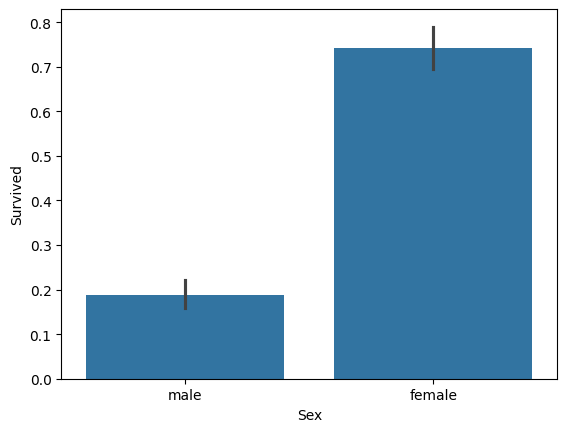

In [22]:
sns.barplot(x= 'Sex', y= 'Survived', data = titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

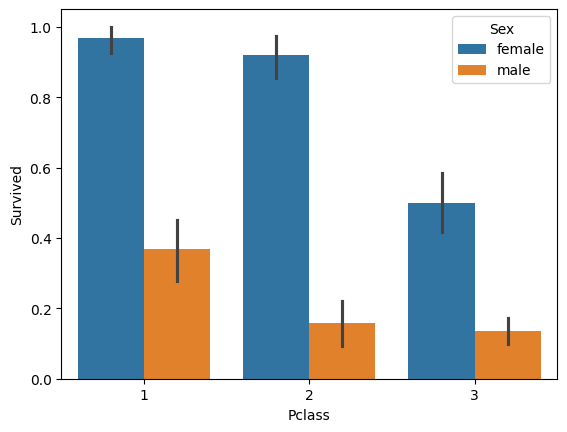

In [23]:
sns.barplot(x= 'Pclass', y= 'Survived', hue = 'Sex', data = titanic_df)

In [24]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. Dataframe의 apply lambda식에 사용.
def get_category (age):
  cat = ' '
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35 : cat = 'YoungAdult'
  elif age <= 60: cat = 'Adult'
  else : cat = 'Elderly'

  return cat

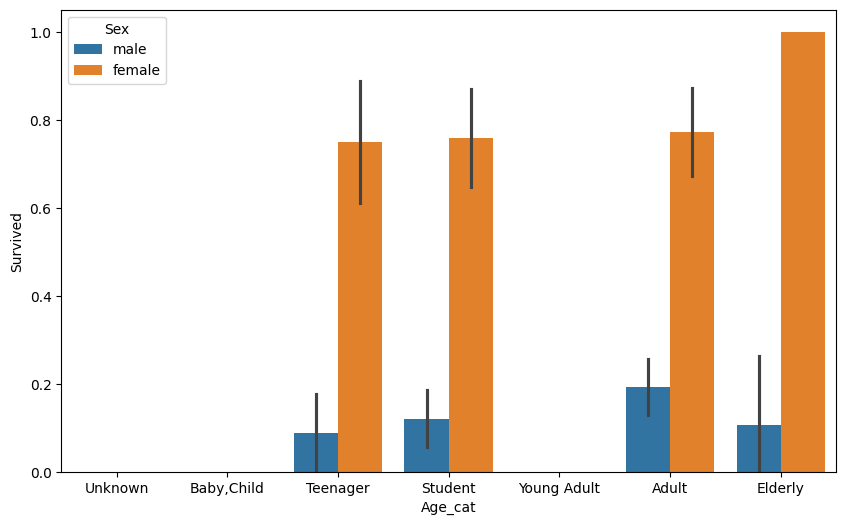

In [25]:
#막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names =['Unknown','Baby,' 'Child', 'Teenager', 'Student', 'Young Adult','Adult','Elderly']

#lambda식에 위에서 생성한 get_category( )함수를 반환 값으로 지정.
#get_category(x)는 입력 값으로 'Age' 칼럼 값을 받아서 해당하는 Cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df .drop('Age_cat', axis=1, inplace=True)

In [26]:
from sklearn import preprocessing

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
  return dataDF

titanic_df =encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [27]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] =df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [28]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df =pd.read_csv('/content/titanic.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,test_size=0.2, random_state=11)

In [30]:
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, RandomForest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf =RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred =dt_clf.predict(X_test)
print( 'DecisionTreeClassifier 정확도 : {0:4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred =rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 :{0:4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도 : 0.787709
RandomForestClassifier 정확도 :0.854749
LogisticRegression 정확도 : 0.8492


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn. model_selection import KFold

def exec_kfold(clf, folds=5):
  #폴드세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성.
  kfold = KFold(n_splits=folds)
  scores = []

  # KFold 교차 검증 수행.
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차검증 별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy =accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차검증{0}정확도: {1:.4f}".format(iter_count,accuracy))

  # 5개 fold에서의 평균 정확도 계산.
  mean_score = np.mean(scores)
  print("평균정확도: {0:.4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차검증0정확도: 0.7542
교차검증1정확도: 0.7809
교차검증2정확도: 0.7865
교차검증3정확도: 0.7697
교차검증4정확도: 0.8202
평균정확도: 0.7823


In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score (dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차검증{0}정확도:{1:4f}'.format(iter_count,accuracy))

print("평균정확도:{0:4f}".format(np.mean(scores)))

교차검증0정확도:0.743017
교차검증1정확도:0.775281
교차검증2정확도:0.792135
교차검증3정확도:0.786517
교차검증4정확도:0.842697
평균정확도:0.787929


In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('Gridsearchcv 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridsearchcV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# Gridsearchcv의 최적 하이퍼 파라미터로 학습된 Eestimator로 예측 및 평가 수행 .
dpredictions = best_dclf.predict(X_test)
accuracy =accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeclassifier 정확도: {0:4f}'.format(accuracy))

Gridsearchcv 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridsearchcV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeclassifier 정확도: 0.871508


##07. 정리
머신러닝 애플리케이션은
1. 데이터의 가공 및 변환 과정의 전처리 작업
2. 데이터를 학습 데이터와 테스트 데이터로 분리하는 데이터 세트 분리 작업
3. 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델 학습
4. 학습된 모델을 기반으로 테스트 데이터에 대한 예측 수행
5. 예측된 결과값을 실제 결과값과 비교해 머신러닝 모델에 대한 평가 수행
의 과정으로 구성

#### 데이터의 전처리 작업
: 오류 데이터의 보정이나 결손값(Null) 처리 등의 다앙한 데이터 클렌징 작업. 레이블 인코딩이나 원-핫인코딩과 같은 인코딩 작업, 그리고 데이터의 스케일링/정규화 작업 등으로 머신러닝 알고리즘이 최적으로 수행 될 수 있게 데이터를 사전 처리하는 것



####ㅇ
머신러닝 모델은 학습 데이터 세트로 학습한 뒤 별도의 테스트 데이터 세트로 평가되어야 함.

또한, 테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델의 학습과 평가는 해당 테스트 데이터 세트에만 치우친 빈약한 머신러닝 모델을 만들 가능성이 높습니다.

이를 해결하기 위해 학습 데이터 세트를 학습 데이터와 검증 데이터로 구성된 여러 개의 폴드 세트로 분리해 교차검증을 수행할 수 있습니다.


#### 교차검증
: KFold, StratifiedkFold, cross_val_score()등의 다양한 클래스와 함수를 제공.
또한 머신러닝모델의 최적의 하이퍼 파라미터를 교차검증을 통해 추출하기 위해 GridSearchcV를 제공.